# DBSCAN Lab
In this notebook, we will use DBSCAN to cluster a couple of data sets. We will examine how changing its parameters (epsilon and min_samples) changes the resulting cluster structure.

**Task 1:** Import *"pandas"* library and read the csv file *"Blobs.csv"*

In [1]:
#write code here
import pandas as pd

df = pd.read_csv("Blobs.csv")

In [2]:
dataset_1= df.values

This our first dataset. It looks like this:

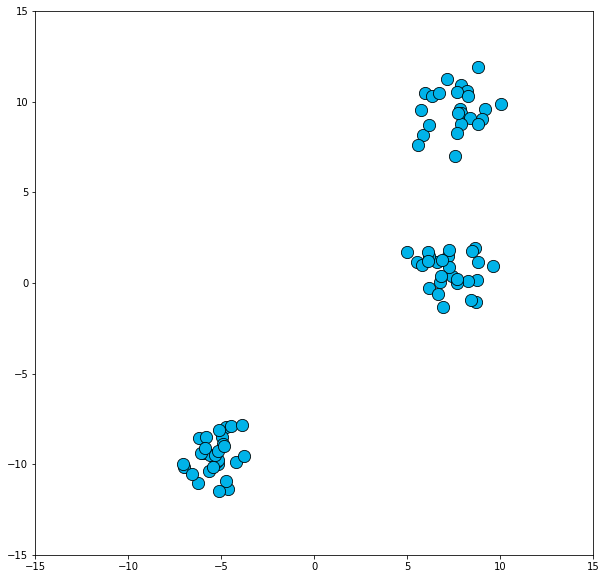

In [3]:
%matplotlib inline

import dbscan_lab_helper as helper    
helper.plot_dataset(dataset_1)

Let's cluster it using DBSCAN's default settings and see what happens. We are hoping for it to be able to assign each of the three "blobs" into its own cluster. Can it do that out of the box?

**Task 2:** Do the following tasks:
<br/>a) Import sklearn's cluster module
<br/>b) Create an instance of DBSCAN
<br/>c) Use DBSCAN's fit_predict to return clustering labels for dataset_1

In [4]:
#Write code for task a
from sklearn import cluster

#Write code for task b
dbscan = cluster.DBSCAN()

#Write code for task c
clustering_labels_1 = dbscan.fit_predict(dataset_1)

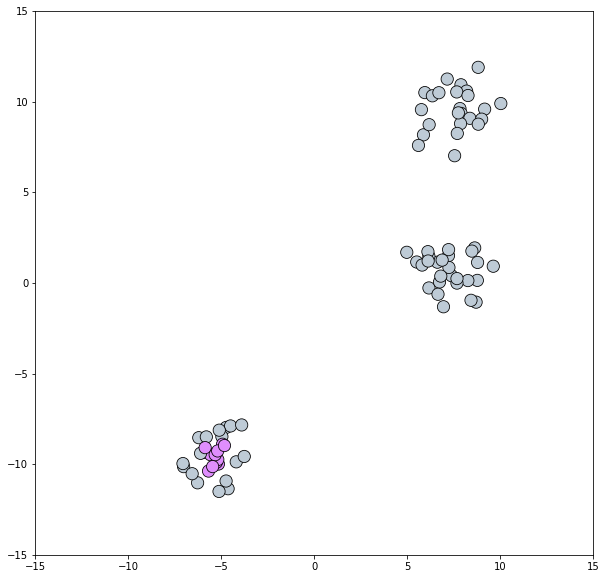

In [5]:
# Plot clustering
helper.plot_clustered_dataset(dataset_1, clustering_labels_1)

Does that look okay? Was it able to group the dataset into the three clusters we were hoping for?

As you see, we will have to make some tweaks. Let's start by looking at Epsilon, the radius of each point's neighborhood. The default value in sklearn is 0.5.

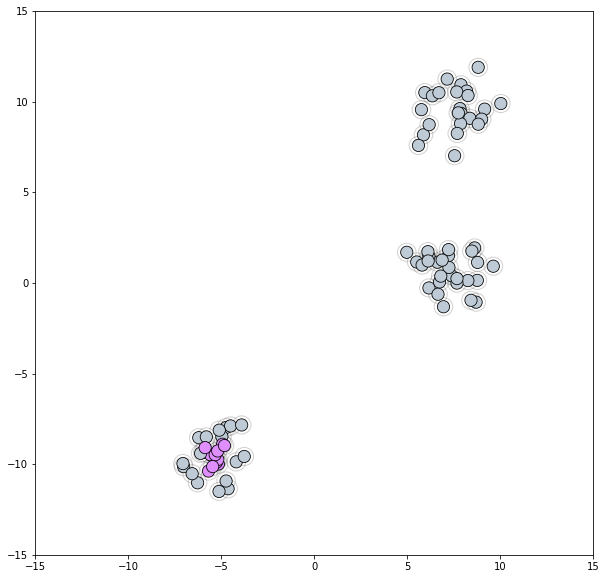

In [6]:
# Plot clustering with neighborhoods
helper.plot_clustered_dataset(dataset_1, clustering_labels_1, neighborhood=True)

From the graph, we can see that an Epsilon value of 0.5 is too small for this dataset. We need to increase it so the points in a blob overlap each others' neighborhoods, but not to the degree where a single cluster would span two blobs.

**Task 3:** Change the value of Epsilon so that each blob is its own cluster (without any noise points). The graph shows  the points in the datasets as well as the neighborhood of each point:

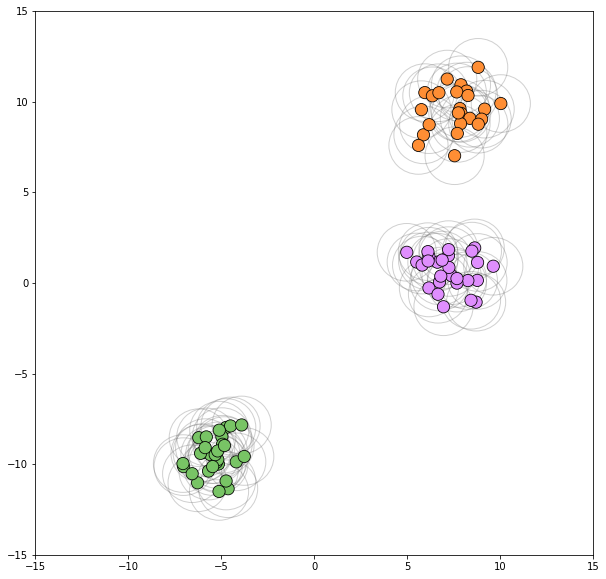

In [7]:
#Change the value epsilon below
epsilon= 1.59

# Cluster
dbscan = cluster.DBSCAN(eps=epsilon)
clustering_labels_2 = dbscan.fit_predict(dataset_1)

# Plot
helper.plot_clustered_dataset(dataset_1, clustering_labels_2, neighborhood=True, epsilon=epsilon)

Were you able to do it? As you change the values, you can see that the points cluster into larger clusters and the number of noise points keeps on decreasing. Then at Epsilon values above 1.6 we get the clustering we're after. But once we increase it to above 5, we start to see two blobs joining together into one cluster. So the right Epsilon would be in the range between those values in this scenario.

## Dataset 2

Let's now look at a dataset that's a little more tricky

**Task 4:** Import the csv file *"Varied.csv"* 

In [8]:
#Write code here
df2= pd.read_csv("Varied.csv")

In [9]:
dataset_2= df2.values

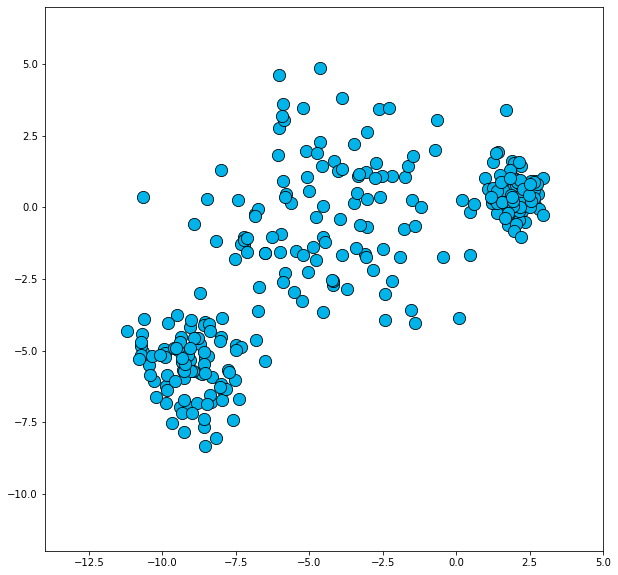

In [10]:
# Plot
helper.plot_dataset(dataset_2, xlim=(-14, 5), ylim=(-12, 7))

What happens if we run DBSCAN with the default parameter values?

**Task 5:** Do the following tasks:
<br/>a) Create an instance of DBSCAN
<br/>b) Use DBSCAN's fit_predict to return clustering labels for dataset_2

In [11]:
# Write code for task a
dbscan = cluster.DBSCAN()

# Write code for task b
clustering_labels_3 = dbscan.fit_predict(dataset_2)

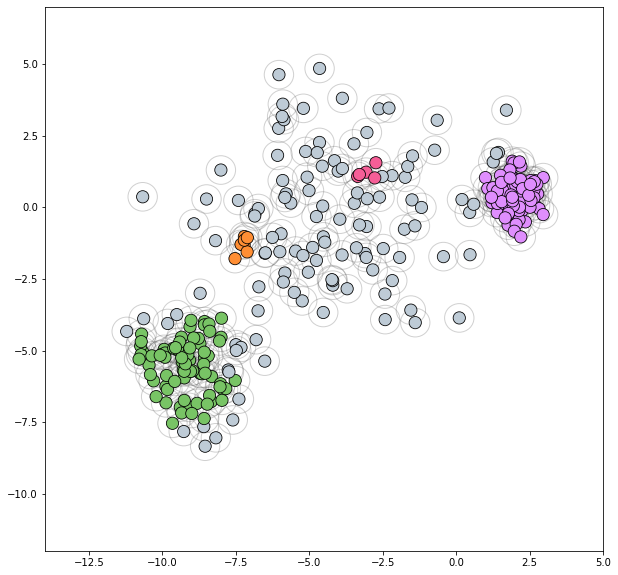

In [12]:
# Plot
helper.plot_clustered_dataset(dataset_2, 
                              clustering_labels_3, 
                              xlim=(-14, 5), 
                              ylim=(-12, 7), 
                              neighborhood=True, 
                              epsilon=0.5)

This clustering could make sense in some scenarios, but it seems rather arbitrary. Looking at the dataset, we can imagine at least two scenarios for what we'd want to do:
 * **Scenario** 1: Break the dataset up into three clusters: the blob on the left, the blob on the right, and the central area (even though it's less dense than the blobs on either side).
 * **Scenario 2**: Break the dataset up into two clusters: the blob on the left, and the blob on the right. Marking all the points in the center as noise. 
 
What values for the DBSCAN parameters would allow us to satisfy each of those senarios? Try a number of parameters to see if you can find a clustering that makes more sense.


**Task 6:** Experiment with different values for eps and min_samples to find a suitable clustering for the dataset.

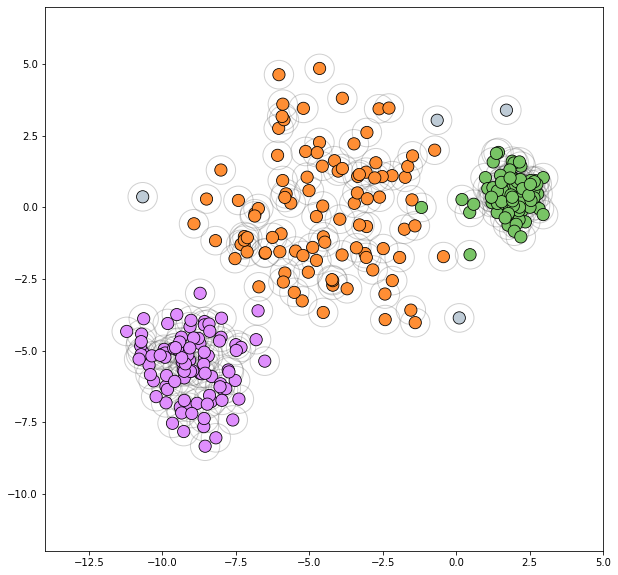

In [13]:
# Change the values below
eps=1.5
min_samples=9

# Cluster with DBSCAN
dbscan = cluster.DBSCAN(eps=eps, min_samples=min_samples)
clustering_labels_4 = dbscan.fit_predict(dataset_2)

# Plot
helper.plot_clustered_dataset(dataset_2, 
                              clustering_labels_4, 
                              xlim=(-14, 5), 
                              ylim=(-12, 7), 
                              neighborhood=True, 
                              epsilon=0.5)


The following grid plots the DBSCAN clustering results of a range of parameter values. Epsilon varies horizontally, while vertically each row shows a different value of min_samples.

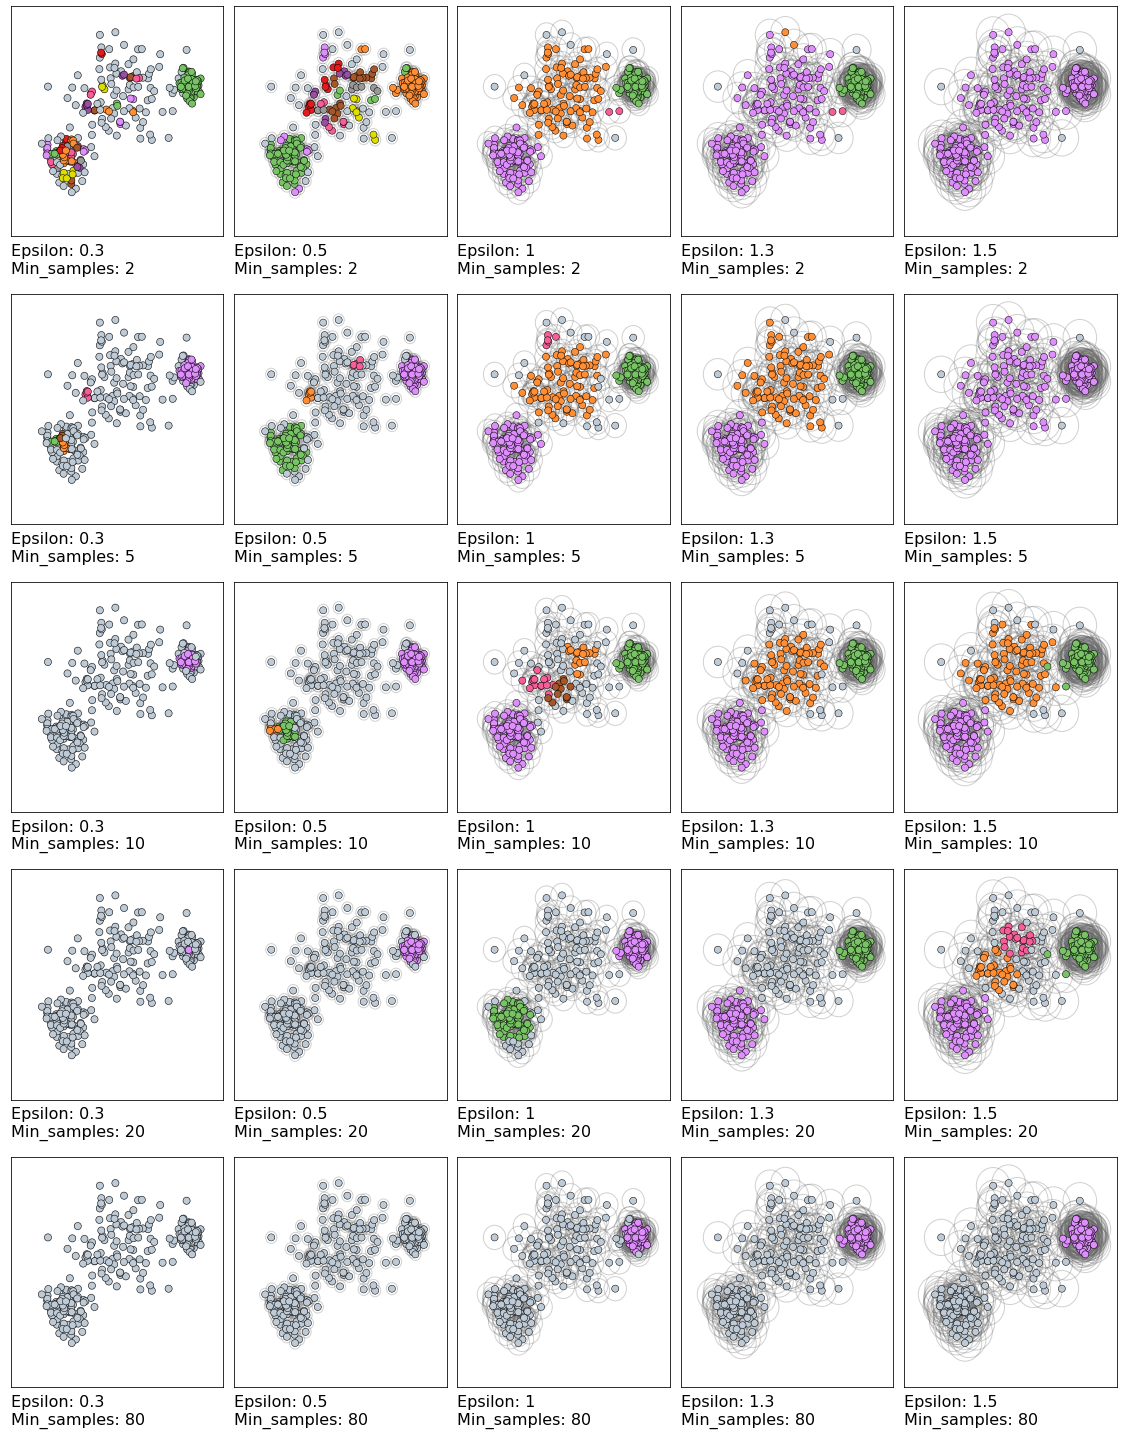

In [14]:
eps_values = [0.3, 0.5, 1, 1.3, 1.5]
min_samples_values = [2, 5, 10, 20, 80]

helper.plot_dbscan_grid(dataset_2, eps_values, min_samples_values)


## Heuristics for experimenting with DBSCAN's parameters
Looking at this grid, we can guess at some general heuristics for tweaking the parameters of DBSCAN:

<img src='images/low_epsilon_and_low_min_sample.png'><br>Many small clusters. More than anticipated for the dataset. <br>**Action**: increase min_samples and epsilon| <img src='images/high_epsilon_and_low_min_sample.png'><br>Most points belong to one cluster<br>**Action**: decrease epsilon and increase min_samples|
<img src='images/low_epsilon_and_high_min_sample.png'><br>Most/all data points are labeled as noise<br>**Action**: increase epsilon and decrease min_sample <img src='images/high_epsilon_and_high_min_sample.png'><br> Except for extremely dense regions, most/all data points are <br>labeled as noise. (Or all points are labeled as noise). <br>**Action**: decrease min_samples and epsilon.

### Quiz
* Which values do you believe best satisfy scenario 1? 
* Which values do you believe best satisfy scenario 2?

### Answers:



Give your answers here:
<br/>1:
<br/>2:

# DBCV

DBCV i.e. Density-Based Clustering Validation is another technique for clustering validation.

## Source

Moulavi, Davoud, et al. "Density-based clustering validation." Proceedings of the 2014 SIAM International Conference on Data Mining. Society for Industrial and Applied Mathematics, 2014.

[Link](https://epubs.siam.org/doi/pdf/10.1137/1.9781611973440.96)

## What is DBCV?

How do you validate clustering assignmnets from unsupervised learning algorithms? A common method is the Silhoette Method, which provides an objective score between -1 and 1 on the quality of clustering. The silhouette value measures how well an object is classified in its own cluster instead of neighboring clusters. The silhouette (and most other popular methods) work very well on globular clusters, but can fail on non-glubular clusters.

Here, we implement DBCV which can validate clustering assignments on non-globular, arbitrarily shaped clusters . In essence, DBCV computes two values:

- The density within a cluster
- The density between clusters

High density within a cluster, and low density between clusters indicates good clustering assignments. Let us have a look at the example below.

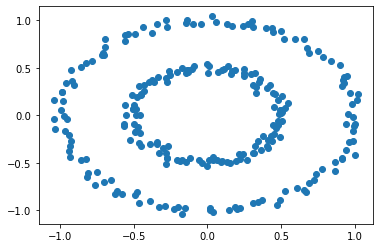

In [15]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

n_samples=250
noisy_moons = datasets.make_circles(n_samples=n_samples, noise=.03,factor=0.5)
X = noisy_moons[0]
plt.scatter(X[:,0], X[:,1])
plt.show()

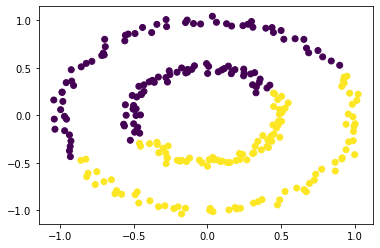

In [16]:
from sklearn.cluster import KMeans

kmeans =  KMeans(n_clusters=2, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=kmeans_labels)
plt.show()

Not so great. Let us check the **Silhouette Score** for these clusters

In [17]:
from sklearn import metrics
metrics.silhouette_score(X, kmeans_labels)

0.3547362116127307

Note that the **Silhouette Score** is not as bad as the clusters made. Let us apply DBSCAN and validate it

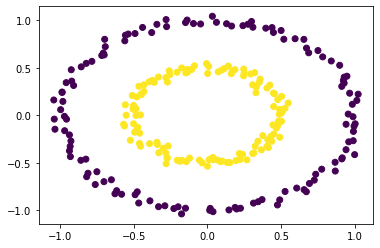

In [18]:
from sklearn import cluster

dbscanner = cluster.DBSCAN(eps=0.3, min_samples=20)
dbscan_labels = dbscanner.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=dbscan_labels)

### Validating the above clusters

**Silhouette Score**

In [19]:
metrics.silhouette_score(X, dbscan_labels)

0.10987705226165226

## Applying DBCV

In [20]:
from scipy.spatial.distance import euclidean
import dbscan_lab_helper as helper

kmeans_score = helper.DBCV(X, kmeans_labels, dist_function=euclidean)
dbscan_score = helper.DBCV(X, dbscan_labels, dist_function=euclidean)

print('KMeans Score for Circles is:', kmeans_score)
print('DBSCAN Score for Circles is:', dbscan_score)

KMeans Score for Circles is: -0.6547807662786457
DBSCAN Score for Circles is: 0.6701516207495319


**Please note that DBCV gives more accurate scores for the clusters made through K-Means and DBSCAN.**